In [28]:
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import IPython.display as ipd
import os
from sklearn.manifold import TSNE
import soundfile as sf
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from scipy.spatial.distance import cdist
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [31]:
# for analysis on national anthem songs in trainset
# Uncomment the following line if you do not have the Python module 'librosa' installed
# !pip install librosa

import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt

# Function to create MFCC coefficients given an audio file

def create_MFCC_coefficients(file_name):

    sr_value = 44100
    n_mfcc_count = 20
    
    try:
        # Load the audio file using librosa
        y, sr = librosa.load(file_name, sr=sr_value)
              
        # Compute MFCC coefficients for the segment
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc_count)
        #print(f"file_name: {file_name}: y={len(y)}, sr={sr}, mfccs matrix:{np.shape(mfccs)}")
        
        # Create and return MFCC dataframe
        coeff_df = pd.DataFrame(mfccs)
        
        return coeff_df

    except Exception as e:
       print(f"Error creating MFCC coefficients: {file_name}:{str(e)}")


# Function to resample MFCC to 2500 columns
def resample_mfcc_to_fixed_columns(mfcc_matrix, target_columns=40):
    original_columns = mfcc_matrix.shape[1]
    window_size = original_columns // target_columns

    if window_size > 1:
        resampled_mfcc = np.apply_along_axis(
            lambda m: np.convolve(m, np.ones(window_size)/window_size, mode='valid')[::window_size],
            axis=1,
            arr=mfcc_matrix
        )
    else:
        resampled_mfcc = mfcc_matrix[:, :target_columns]

    if resampled_mfcc.shape[1] > target_columns:
        resampled_mfcc = resampled_mfcc[:, :target_columns]
    elif resampled_mfcc.shape[1] < target_columns:
        padding = target_columns - resampled_mfcc.shape[1]
        resampled_mfcc = np.pad(resampled_mfcc, ((0, 0), (0, padding)), mode='constant')

    return resampled_mfcc

# List to store the 0th row of each MFCC
nationalanthem_0th_rows = []
audio_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\1'
# Process each audio file in the folder
for file_name in os.listdir(audio_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(audio_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            nationalanthem_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for national anthem training set
nationalanthem_trainset = pd.DataFrame(nationalanthem_0th_rows)
print("Shape of nationalanthem_trainset:", nationalanthem_trainset.shape)



Shape of nationalanthem_trainset: (7, 40)


In [32]:
# List to store the 0th row of each MFCC for Michael Jackson songs
michaeljackson_0th_rows = []
michael_jackson_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\mj'  # Change this path to the folder containing Michael Jackson songs

# Process each audio file in the Michael Jackson folder
for file_name in os.listdir(michael_jackson_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(michael_jackson_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            michaeljackson_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for Michael Jackson training set
michaeljackson_trainset = pd.DataFrame(michaeljackson_0th_rows)
print("Shape of michaeljackson_trainset:", michaeljackson_trainset.shape)


Shape of michaeljackson_trainset: (11, 40)


In [33]:
# List to store the 0th row of each MFCC for Kishor Kumar songs
kishorkumar_0th_rows = []
kishor_kumar_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\kk'  # Change this path to the folder containing Kishor Kumar songs

# Process each audio file in the Kishor Kumar folder
for file_name in os.listdir(kishor_kumar_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(kishor_kumar_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            kishorkumar_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for Kishor Kumar training set
kishorkumar_trainset = pd.DataFrame(kishorkumar_0th_rows)
print("Shape of kishorkumar_trainset:", kishorkumar_trainset.shape)


Shape of kishorkumar_trainset: (12, 40)


In [34]:
# List to store the 0th row of each MFCC for Asha Bhosle songs
ashabhosle_0th_rows = []
asha_bhosle_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\ab'  # Change this path to the folder containing Asha Bhosle songs

# Process each audio file in the Asha Bhosle folder
for file_name in os.listdir(asha_bhosle_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(asha_bhosle_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            ashabhosle_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for Asha Bhosle training set
ashabhosle_trainset = pd.DataFrame(ashabhosle_0th_rows)
print("Shape of ashabhosle_trainset:", ashabhosle_trainset.shape)


Shape of ashabhosle_trainset: (12, 40)


In [35]:
# List to store the 0th row of each MFCC for Bhav Geet songs
bhavgeet_0th_rows = []
bhavgeet_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\bg'  # Change this path to the folder containing Bhav Geet songs

# Process each audio file in the Bhav Geet folder
for file_name in os.listdir(bhavgeet_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(bhavgeet_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            bhavgeet_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for Bhav Geet training set
bhavgeet_trainset = pd.DataFrame(bhavgeet_0th_rows)
print("Shape of bhavgeet_trainset:", bhavgeet_trainset.shape)


Shape of bhavgeet_trainset: (11, 40)


In [36]:
# List to store the 0th row of each MFCC for Lavni songs
lavni_0th_rows = []
lavni_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project\songs\lavni'  # Change this path to the folder containing Lavni songs

# Process each audio file in the Lavni folder
for file_name in os.listdir(lavni_folder):
    if file_name.endswith('.mp3'):  # Process only mp3 files
        file_path = os.path.join(lavni_folder, file_name)
        
        # Generate MFCC
        mfcc_df = create_MFCC_coefficients(file_path)
        if mfcc_df is not None:
            mfcc_matrix = mfcc_df.values
            
            # Resample MFCC to 2500 columns
            resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_matrix)
            
            # Extract 0th row and add to list
            lavni_0th_rows.append(resampled_mfcc[0, :])

# Create DataFrame for Lavni training set
lavni_trainset = pd.DataFrame(lavni_0th_rows)
print("Shape of lavni_trainset:", lavni_trainset.shape)


Shape of lavni_trainset: (11, 40)


In [3]:

# Assuming your MFCC files are in a folder named 'PROJECT'
mfcc_data_folder = r'C:\Users\91751\OneDrive - Indian Institute of Technology Bombay\Desktop\DS 203 assignemnts\Project'  

# Initialize an empty list to store DataFrames
mfcc_data = []

for i in range(1, 116):  # Loop from 1 to 115 (inclusive)
    filename = f"{i:02d}-MFCC.csv"  # Create filename with leading zero
    filepath = os.path.join(mfcc_data_folder, filename)
    
    try:
        # Load the MFCC data (adjust header if needed)
        mfccs = pd.read_csv(filepath, header=None)  
        
        # Add a column to identify the song (optional, but helpful)
        mfccs['song_id'] = i 
        
        # Append the DataFrame to the list
        mfcc_data.append(mfccs)
        
        print(f"Loaded MFCCs from {filename}")  # Print the prompt
    
    except Exception as e:
        print(f"Error reading or processing {filename}: {e}")


Loaded MFCCs from 01-MFCC.csv
Loaded MFCCs from 02-MFCC.csv
Loaded MFCCs from 03-MFCC.csv
Loaded MFCCs from 04-MFCC.csv
Loaded MFCCs from 05-MFCC.csv
Loaded MFCCs from 06-MFCC.csv
Loaded MFCCs from 07-MFCC.csv
Loaded MFCCs from 08-MFCC.csv
Loaded MFCCs from 09-MFCC.csv
Loaded MFCCs from 10-MFCC.csv
Loaded MFCCs from 11-MFCC.csv
Loaded MFCCs from 12-MFCC.csv
Loaded MFCCs from 13-MFCC.csv
Loaded MFCCs from 14-MFCC.csv
Loaded MFCCs from 15-MFCC.csv
Loaded MFCCs from 16-MFCC.csv
Loaded MFCCs from 17-MFCC.csv
Loaded MFCCs from 18-MFCC.csv
Loaded MFCCs from 19-MFCC.csv
Loaded MFCCs from 20-MFCC.csv
Loaded MFCCs from 21-MFCC.csv
Loaded MFCCs from 22-MFCC.csv
Loaded MFCCs from 23-MFCC.csv
Loaded MFCCs from 24-MFCC.csv
Loaded MFCCs from 25-MFCC.csv
Loaded MFCCs from 26-MFCC.csv
Loaded MFCCs from 27-MFCC.csv
Loaded MFCCs from 28-MFCC.csv
Loaded MFCCs from 29-MFCC.csv
Loaded MFCCs from 30-MFCC.csv
Loaded MFCCs from 31-MFCC.csv
Loaded MFCCs from 32-MFCC.csv
Loaded MFCCs from 33-MFCC.csv
Loaded MFC

In [4]:

# Initialize an empty list to store the time dimension of each MFCC DataFrame
time_values = []  

# Iterate through the list of MFCC DataFrames
for df in mfcc_data:
    # Get the number of columns (excluding the 'song_id' column)
    time_value = df.shape[1] - 1  
    time_values.append(time_value)

# Create timedf with the desired shape (initially 0 rows, 1 column)
timedf = pd.DataFrame(columns=['time'])

# Assign the time_values to the 'time' column of timedf
timedf['time'] = time_values

# Print some info
print(timedf.head())  # Print the first few rows

    time
0   9866
1   9321
2  24716
3  19292
4  21338


In [5]:
timedf.rename(columns={'time': 'shape1'}, inplace=True)

In [6]:
timedf['seconds'] = timedf['shape1'] / 86
print(timedf.head())

# get min time in timedf['seconds']]
min_time = timedf['seconds'].min()
print(min_time)
# print sentence min no. of columns are and then print min of shape 1
print(f"Minimum number of columns are {timedf['shape1'].min()} with time {timedf['seconds'].min()} for file {timedf['shape1'].idxmin() + 1}")
# print sentence max no. of columns are and then print max of shape 1
print(f"Maximum number of columns are {timedf['shape1'].max()} with time {timedf['seconds'].max()} for file {timedf['shape1'].idxmax() + 1}")

   shape1     seconds
0    9866  114.720930
1    9321  108.383721
2   24716  287.395349
3   19292  224.325581
4   21338  248.116279
70.51162790697674
Minimum number of columns are 6064 with time 70.51162790697674 for file 75
Maximum number of columns are 40151 with time 466.8720930232558 for file 34


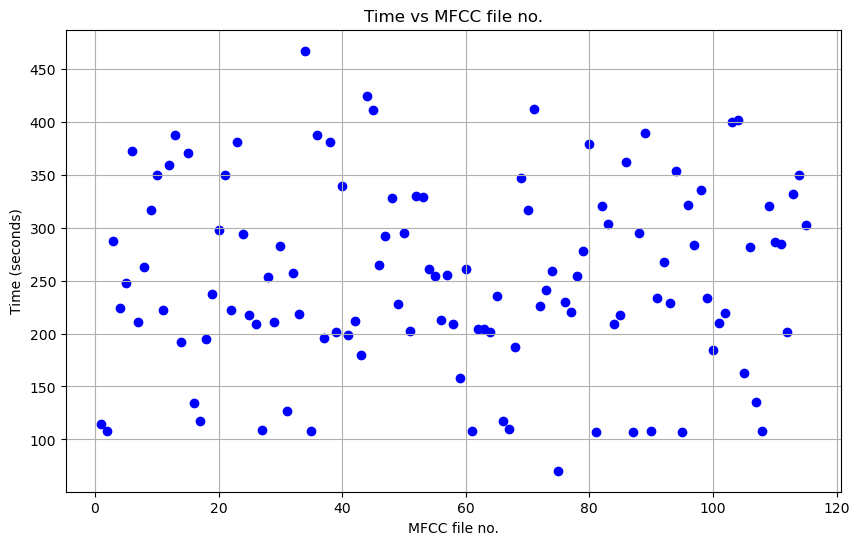

In [7]:
# plot a scatter plot of time vs corresponding row number
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
plt.scatter(timedf.index + 1, timedf['seconds'], marker='o', color='b')  # Plot the scatter plot
plt.title('Time vs MFCC file no.')  # Set the title of the plot
plt.xlabel('MFCC file no.')  # Set the x-axis label
plt.ylabel('Time (seconds)')  # Set the y-axis label
plt.grid(True)  # Show grid lines (optional)
plt.show()  # Display the plot

In [37]:

# Target number of columns
target_columns = 40

# Function to resample an MFCC matrix to 2500 columns
def resample_mfcc_to_fixed_columns(mfcc_matrix, target_columns=40):
    # Original number of columns
    original_columns = mfcc_matrix.shape[1]
    
    # Calculate the moving average window size
    window_size = original_columns // target_columns
    
    # Resample using moving average
    if window_size > 1:
        # Apply moving average along each row (axis=1)
        resampled_mfcc = np.apply_along_axis(
            lambda m: np.convolve(m, np.ones(window_size)/window_size, mode='valid')[::window_size],
            axis=1,
            arr=mfcc_matrix
        )
    else:
        # If the number of columns is already close to the target, just downsample directly
        resampled_mfcc = mfcc_matrix[:, :target_columns]
    
    # Truncate or pad the result to exactly target_columns if necessary
    if resampled_mfcc.shape[1] > target_columns:
        resampled_mfcc = resampled_mfcc[:, :target_columns]
    elif resampled_mfcc.shape[1] < target_columns:
        padding = target_columns - resampled_mfcc.shape[1]
        resampled_mfcc = np.pad(resampled_mfcc, ((0, 0), (0, padding)), mode='constant')

    return resampled_mfcc

# Apply resampling to all loaded MFCC data
resampled_mfcc_data = []
for df in mfcc_data:
    # Drop the 'song_id' column if present
    mfcc_values = df.drop(columns=['song_id'], errors='ignore').values
    # Resample to 2500 columns
    resampled_mfcc = resample_mfcc_to_fixed_columns(mfcc_values, target_columns)
    resampled_mfcc_data.append(resampled_mfcc)

# Verify shapes of the resampled data
for i, resampled_mfcc in enumerate(resampled_mfcc_data):
    print(f"Resampled MFCC for song {i + 1}: shape {resampled_mfcc.shape}")

Resampled MFCC for song 1: shape (20, 40)
Resampled MFCC for song 2: shape (20, 40)
Resampled MFCC for song 3: shape (20, 40)
Resampled MFCC for song 4: shape (20, 40)
Resampled MFCC for song 5: shape (20, 40)
Resampled MFCC for song 6: shape (20, 40)
Resampled MFCC for song 7: shape (20, 40)
Resampled MFCC for song 8: shape (20, 40)
Resampled MFCC for song 9: shape (20, 40)
Resampled MFCC for song 10: shape (20, 40)
Resampled MFCC for song 11: shape (20, 40)
Resampled MFCC for song 12: shape (20, 40)
Resampled MFCC for song 13: shape (20, 40)
Resampled MFCC for song 14: shape (20, 40)
Resampled MFCC for song 15: shape (20, 40)
Resampled MFCC for song 16: shape (20, 40)
Resampled MFCC for song 17: shape (20, 40)
Resampled MFCC for song 18: shape (20, 40)
Resampled MFCC for song 19: shape (20, 40)
Resampled MFCC for song 20: shape (20, 40)
Resampled MFCC for song 21: shape (20, 40)
Resampled MFCC for song 22: shape (20, 40)
Resampled MFCC for song 23: shape (20, 40)
Resampled MFCC for s

In [38]:

# Initialize a list to store the 0th row of each resampled MFCC
mfcc_0th_rows = []

# Iterate over the resampled MFCC data and extract the 0th row
for resampled_mfcc in resampled_mfcc_data:
    # Extract the 0th row (first row) with 2500 columns
    mfcc_0th_row = resampled_mfcc[0, :]  # Extract 0th row
    mfcc_0th_rows.append(mfcc_0th_row)

# Convert the list of 0th rows into a DataFrame
mfcc_0th_rows_df = pd.DataFrame(mfcc_0th_rows)

# Display the shape to verify
print("Shape of the new DataFrame with 0th row features:", mfcc_0th_rows_df.shape)

Shape of the new DataFrame with 0th row features: (115, 40)


In [39]:

# Calculate the Euclidean distance between each train song and all test songs
distances = cdist(nationalanthem_trainset.values, mfcc_0th_rows_df.values, metric='euclidean')

# Convert to DataFrame for easier inspection
distance_df = pd.DataFrame(distances, index=[f'Train Song {i+1}' for i in range(nationalanthem_trainset.shape[0])],
                           columns=[f'Test Song {j+1}' for j in range(mfcc_0th_rows_df.shape[0])])

# For each train song, find the 15 closest matching test songs with distances in sorted order
closest_matches = {}

for i in range(distance_df.shape[0]):
    sorted_matches = distance_df.iloc[i].nsmallest(20)
    closest_matches[f'Train Song {i+1}'] = sorted_matches.index.tolist()

# Convert closest matches dictionary to DataFrame
closest_matches_df = pd.DataFrame(closest_matches).T
closest_matches_df.columns = [f"Closest Test Song {j+1}" for j in range(20)]

closest_matches_df.head()

,Closest Test Song 1,Closest Test Song 2,Closest Test Song 3,Closest Test Song 4,Closest Test Song 5,Closest Test Song 6,Closest Test Song 7,Closest Test Song 8,Closest Test Song 9,Closest Test Song 10,Closest Test Song 11,Closest Test Song 12,Closest Test Song 13,Closest Test Song 14,Closest Test Song 15,Closest Test Song 16,Closest Test Song 17,Closest Test Song 18,Closest Test Song 19,Closest Test Song 20
Train Song 1,Test Song 2,Test Song 115,Test Song 75,Test Song 63,Test Song 108,Test Song 23,Test Song 1,Test Song 27,Test Song 61,Test Song 17,Test Song 109,Test Song 94,Test Song 87,Test Song 26,Test Song 46,Test Song 106,Test Song 30,Test Song 24,Test Song 70,Test Song 97
Train Song 2,Test Song 50,Test Song 111,Test Song 26,Test Song 100,Test Song 83,Test Song 28,Test Song 102,Test Song 63,Test Song 5,Test Song 97,Test Song 105,Test Song 9,Test Song 96,Test Song 29,Test Song 115,Test Song 46,Test Song 18,Test Song 51,Test Song 84,Test Song 38
Train Song 3,Test Song 31,Test Song 1,Test Song 82,Test Song 24,Test Song 9,Test Song 27,Test Song 93,Test Song 52,Test Song 115,Test Song 46,Test Song 96,Test Song 29,Test Song 75,Test Song 5,Test Song 90,Test Song 26,Test Song 106,Test Song 66,Test Song 103,Test Song 100
Train Song 4,Test Song 53,Test Song 98,Test Song 60,Test Song 86,Test Song 89,Test Song 81,Test Song 47,Test Song 69,Test Song 36,Test Song 6,Test Song 20,Test Song 13,Test Song 15,Test Song 104,Test Song 10,Test Song 113,Test Song 8,Test Song 56,Test Song 76,Test Song 78
Train Song 5,Test Song 80,Test Song 55,Test Song 76,Test Song 54,Test Song 48,Test Song 56,Test Song 106,Test Song 13,Test Song 36,Test Song 109,Test Song 15,Test Song 21,Test Song 10,Test Song 30,Test Song 51,Test Song 71,Test Song 104,Test Song 23,Test Song 85,Test Song 18


In [40]:

# Initialize a list to store the test song names and distances
song_distance_list = []

# Iterate through each train song in the closest_matches_df to get test song names and distances
for train_song in closest_matches_df.index:
    for test_song in closest_matches_df.loc[train_song]:
        # Get the corresponding Euclidean distance from the original distance DataFrame
        distance = distance_df.loc[train_song, test_song]
        song_distance_list.append((test_song, distance))

# Convert the list to a DataFrame
song_distance_df = pd.DataFrame(song_distance_list, columns=['Test Song', 'Distance'])

# Calculate the count and average distance for each test song
test_song_summary = song_distance_df.groupby('Test Song').agg(
    Count=('Test Song', 'size'),
    Average_Distance=('Distance', 'mean')
).sort_values(by='Count', ascending=False).reset_index()

# Display the final DataFrame
print(test_song_summary)

       Test Song  Count  Average_Distance
0   Test Song 36      4        508.077602
1   Test Song 10      4        523.552865
2    Test Song 1      3        614.259994
3   Test Song 76      3        493.458074
4   Test Song 56      3        496.384872
..           ...    ...               ...
71  Test Song 52      1        565.118670
72  Test Song 31      1        513.766652
73  Test Song 35      1        545.646116
74  Test Song 48      1        557.339543
75  Test Song 50      1        281.432862

[76 rows x 3 columns]


In [41]:

# Calculate the Euclidean distance between each Michael Jackson train song and all test songs
distances_mj = cdist(michaeljackson_trainset.values, mfcc_0th_rows_df.values, metric='euclidean')

# Convert to DataFrame for easier inspection
distance_mj_df = pd.DataFrame(distances_mj, index=[f'Train Song MJ {i+1}' for i in range(michaeljackson_trainset.shape[0])],
                              columns=[f'Test Song {j+1}' for j in range(mfcc_0th_rows_df.shape[0])])

# For each Michael Jackson train song, find the 15 closest matching test songs with distances in sorted order
closest_matches_mj = {}

for i in range(distance_mj_df.shape[0]):
    sorted_matches_mj = distance_mj_df.iloc[i].nsmallest(20)
    closest_matches_mj[f'Train Song MJ {i+1}'] = sorted_matches_mj.index.tolist()

# Convert closest matches dictionary to DataFrame
closest_matches_mj_df = pd.DataFrame(closest_matches_mj).T
closest_matches_mj_df.columns = [f"Closest Test Song {j+1}" for j in range(20)]

# Display the closest matches DataFrame for Michael Jackson songs
print("Closest matches for each Michael Jackson train song:")
print(closest_matches_mj_df.head())

# Initialize a list to store the test song names and distances for Michael Jackson songs
mj_song_distance_list = []

# Iterate through each train song in the closest_matches_mj_df to get test song names and distances
for train_song in closest_matches_mj_df.index:
    for test_song in closest_matches_mj_df.loc[train_song]:
        # Get the corresponding Euclidean distance from the original distance DataFrame
        distance = distance_mj_df.loc[train_song, test_song]
        mj_song_distance_list.append((test_song, distance))

# Convert the list to a DataFrame
mj_song_distance_df = pd.DataFrame(mj_song_distance_list, columns=['Test Song', 'Distance'])

# Calculate the count and average distance for each test song
mj_test_song_summary = mj_song_distance_df.groupby('Test Song').agg(
    Count=('Test Song', 'size'),
    Average_Distance=('Distance', 'mean')
).sort_values(by='Count', ascending=False).reset_index()

# Display the final summary DataFrame for Michael Jackson songs
print("Summary of test song matches for Michael Jackson train songs:")
print(mj_test_song_summary)

Closest matches for each Michael Jackson train song:
                Closest Test Song 1 Closest Test Song 2 Closest Test Song 3  \
Train Song MJ 1        Test Song 86         Test Song 3        Test Song 98   
Train Song MJ 2        Test Song 59       Test Song 106        Test Song 21   
Train Song MJ 3        Test Song 45         Test Song 3       Test Song 114   
Train Song MJ 4        Test Song 59        Test Song 84        Test Song 93   
Train Song MJ 5        Test Song 71       Test Song 106       Test Song 115   

                Closest Test Song 4 Closest Test Song 5 Closest Test Song 6  \
Train Song MJ 1        Test Song 47        Test Song 60        Test Song 69   
Train Song MJ 2        Test Song 92        Test Song 44        Test Song 46   
Train Song MJ 3       Test Song 103        Test Song 20        Test Song 44   
Train Song MJ 4        Test Song 46        Test Song 71         Test Song 5   
Train Song MJ 5        Test Song 59        Test Song 46         Test Song 1  

In [42]:
from scipy.spatial.distance import cdist
import pandas as pd

# Calculate the Euclidean distance between each Kishor Kumar train song and all test songs
distances_kishor = cdist(kishorkumar_trainset.values, mfcc_0th_rows_df.values, metric='euclidean')

# Convert to DataFrame for easier inspection
distance_kishor_df = pd.DataFrame(distances_kishor, index=[f'Train Song KK {i+1}' for i in range(kishorkumar_trainset.shape[0])],
                                  columns=[f'Test Song {j+1}' for j in range(mfcc_0th_rows_df.shape[0])])

# For each Kishor Kumar train song, find the 15 closest matching test songs with distances in sorted order
closest_matches_kishor = {}

for i in range(distance_kishor_df.shape[0]):
    sorted_matches_kishor = distance_kishor_df.iloc[i].nsmallest(20)
    closest_matches_kishor[f'Train Song KK {i+1}'] = sorted_matches_kishor.index.tolist()

# Convert closest matches dictionary to DataFrame
closest_matches_kishor_df = pd.DataFrame(closest_matches_kishor).T
closest_matches_kishor_df.columns = [f"Closest Test Song {j+1}" for j in range(20)]

# Display the closest matches DataFrame for Kishor Kumar songs
print("Closest matches for each Kishor Kumar train song:")
print(closest_matches_kishor_df.head())

# Initialize a list to store the test song names and distances for Kishor Kumar songs
kk_song_distance_list = []

# Iterate through each train song in the closest_matches_kishor_df to get test song names and distances
for train_song in closest_matches_kishor_df.index:
    for test_song in closest_matches_kishor_df.loc[train_song]:
        # Get the corresponding Euclidean distance from the original distance DataFrame
        distance = distance_kishor_df.loc[train_song, test_song]
        kk_song_distance_list.append((test_song, distance))

# Convert the list to a DataFrame
kk_song_distance_df = pd.DataFrame(kk_song_distance_list, columns=['Test Song', 'Distance'])

# Calculate the count and average distance for each test song
kk_test_song_summary = kk_song_distance_df.groupby('Test Song').agg(
    Count=('Test Song', 'size'),
    Average_Distance=('Distance', 'mean')
).sort_values(by='Count', ascending=False).reset_index()

# Display the final summary DataFrame for Kishor Kumar songs
print("Summary of test song matches for Kishor Kumar train songs:")
print(kk_test_song_summary)


Closest matches for each Kishor Kumar train song:
                Closest Test Song 1 Closest Test Song 2 Closest Test Song 3  \
Train Song KK 1        Test Song 18        Test Song 97        Test Song 51   
Train Song KK 2        Test Song 93        Test Song 96         Test Song 9   
Train Song KK 3         Test Song 5        Test Song 18        Test Song 46   
Train Song KK 4        Test Song 59       Test Song 106        Test Song 84   
Train Song KK 5       Test Song 115         Test Song 5        Test Song 18   

                Closest Test Song 4 Closest Test Song 5 Closest Test Song 6  \
Train Song KK 1        Test Song 23        Test Song 84         Test Song 5   
Train Song KK 2        Test Song 46         Test Song 5        Test Song 82   
Train Song KK 3        Test Song 84        Test Song 97       Test Song 115   
Train Song KK 4        Test Song 21        Test Song 80         Test Song 5   
Train Song KK 5        Test Song 26        Test Song 82       Test Song 106   



In [43]:
from scipy.spatial.distance import cdist
import pandas as pd

# Calculate the Euclidean distance between each Asha Bhosle train song and all test songs
distances_asha = cdist(ashabhosle_trainset.values, mfcc_0th_rows_df.values, metric='euclidean')

# Convert to DataFrame for easier inspection
distance_asha_df = pd.DataFrame(distances_asha, index=[f'Train Song AB {i+1}' for i in range(ashabhosle_trainset.shape[0])],
                                columns=[f'Test Song {j+1}' for j in range(mfcc_0th_rows_df.shape[0])])

# For each Asha Bhosle train song, find the 15 closest matching test songs with distances in sorted order
closest_matches_asha = {}

for i in range(distance_asha_df.shape[0]):
    sorted_matches_asha = distance_asha_df.iloc[i].nsmallest(20)
    closest_matches_asha[f'Train Song AB {i+1}'] = sorted_matches_asha.index.tolist()

# Convert closest matches dictionary to DataFrame
closest_matches_asha_df = pd.DataFrame(closest_matches_asha).T
closest_matches_asha_df.columns = [f"Closest Test Song {j+1}" for j in range(20)]

# Display the closest matches DataFrame for Asha Bhosle songs
print("Closest matches for each Asha Bhosle train song:")
print(closest_matches_asha_df.head())

# Initialize a list to store the test song names and distances for Asha Bhosle songs
asha_song_distance_list = []

# Iterate through each train song in the closest_matches_asha_df to get test song names and distances
for train_song in closest_matches_asha_df.index:
    for test_song in closest_matches_asha_df.loc[train_song]:
        # Get the corresponding Euclidean distance from the original distance DataFrame
        distance = distance_asha_df.loc[train_song, test_song]
        asha_song_distance_list.append((test_song, distance))

# Convert the list to a DataFrame
asha_song_distance_df = pd.DataFrame(asha_song_distance_list, columns=['Test Song', 'Distance'])

# Calculate the count and average distance for each test song
asha_test_song_summary = asha_song_distance_df.groupby('Test Song').agg(
    Count=('Test Song', 'size'),
    Average_Distance=('Distance', 'mean')
).sort_values(by='Count', ascending=False).reset_index()

# Display the final summary DataFrame for Asha Bhosle songs
print("Summary of test song matches for Asha Bhosle train songs:")
print(asha_test_song_summary)


Closest matches for each Asha Bhosle train song:
                Closest Test Song 1 Closest Test Song 2 Closest Test Song 3  \
Train Song AB 1         Test Song 5        Test Song 26        Test Song 97   
Train Song AB 2       Test Song 102       Test Song 105        Test Song 29   
Train Song AB 3        Test Song 47        Test Song 76        Test Song 10   
Train Song AB 4        Test Song 97         Test Song 5        Test Song 28   
Train Song AB 5        Test Song 47        Test Song 98        Test Song 89   

                Closest Test Song 4 Closest Test Song 5 Closest Test Song 6  \
Train Song AB 1        Test Song 28        Test Song 46        Test Song 18   
Train Song AB 2       Test Song 111        Test Song 67        Test Song 83   
Train Song AB 3        Test Song 15         Test Song 6        Test Song 80   
Train Song AB 4        Test Song 26       Test Song 115        Test Song 18   
Train Song AB 5        Test Song 60        Test Song 10         Test Song 6   

 

In [45]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Prepare the training data
# Add labels to each training set
nationalanthem_trainset['Label'] = 'National Anthem'
michaeljackson_trainset['Label'] = 'Michael Jackson'
kishorkumar_trainset['Label'] = 'Kishor Kumar'
ashabhosle_trainset['Label'] = 'Asha Bhosle'
bhavgeet_trainset['Label'] = 'Bhav Geet'
lavni_trainset['Label'] = 'Lavni'

# Combine all training data into one DataFrame
train_df = pd.concat([nationalanthem_trainset, michaeljackson_trainset, kishorkumar_trainset,
                      ashabhosle_trainset, bhavgeet_trainset, lavni_trainset], ignore_index=True)

# Separate features and labels
X_train = train_df.drop(columns=['Label']).values  # Feature matrix
y_train = train_df['Label'].values                 # Labels

# Step 2: Prepare the test data
# Assuming mfcc_0th_rows_df contains the 0th row MFCC features for each test song
X_test = mfcc_0th_rows_df.values

# Step 3: Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_classifier.fit(X_train, y_train)

# Step 4: Predict classes for the test set
y_pred = rf_classifier.predict(X_test)

# Step 5: Create a DataFrame for predictions
# Assuming the test songs are named Test Song 1, Test Song 2, etc.
predictions_df = pd.DataFrame({
    'Test Song': [f'Test Song {i+1}' for i in range(len(y_pred))],
    'Predicted Category': y_pred
})

# Display the prediction DataFrame
print("Predictions for each test song:")
print(predictions_df.head())

# Step 6: Group test songs by predicted category into separate DataFrames
categories = predictions_df['Predicted Category'].unique()  # Get unique categories

# Create a dictionary of DataFrames, one for each category
category_dfs = {category: predictions_df[predictions_df['Predicted Category'] == category] for category in categories}

# Display each category DataFrame
for category, df in category_dfs.items():
    print(f"\nSongs predicted in category '{category}':")
    print(df)

# count of each category songs
print("Count of each category songs")
for category, df in category_dfs.items():
    print(f"Count of songs in category '{category}': {df.shape[0]}")



Predictions for each test song:
     Test Song Predicted Category
0  Test Song 1       Kishor Kumar
1  Test Song 2    Michael Jackson
2  Test Song 3    Michael Jackson
3  Test Song 4       Kishor Kumar
4  Test Song 5          Bhav Geet

Songs predicted in category 'Kishor Kumar':
         Test Song Predicted Category
0      Test Song 1       Kishor Kumar
3      Test Song 4       Kishor Kumar
11    Test Song 12       Kishor Kumar
14    Test Song 15       Kishor Kumar
17    Test Song 18       Kishor Kumar
20    Test Song 21       Kishor Kumar
21    Test Song 22       Kishor Kumar
22    Test Song 23       Kishor Kumar
23    Test Song 24       Kishor Kumar
24    Test Song 25       Kishor Kumar
29    Test Song 30       Kishor Kumar
31    Test Song 32       Kishor Kumar
32    Test Song 33       Kishor Kumar
36    Test Song 37       Kishor Kumar
39    Test Song 40       Kishor Kumar
41    Test Song 42       Kishor Kumar
42    Test Song 43       Kishor Kumar
47    Test Song 48       Kishor Kum

In [30]:

# Number of clusters based on the types of songs
k = 6

# Initialize and fit the KMeans model with 6 clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(mfcc_0th_rows_df)

# Add the cluster labels to the DataFrame
mfcc_0th_rows_df['Cluster'] = kmeans.labels_

# Display the clusters assigned to each song
print(mfcc_0th_rows_df[['Cluster']])

# Count the number of songs in each cluster
cluster_counts = mfcc_0th_rows_df['Cluster'].value_counts()
print("\nSong counts in each cluster:")
print(cluster_counts)

     Cluster
0          3
1          1
2          4
3          3
4          3
..       ...
110        2
111        4
112        4
113        5
114        3

[115 rows x 1 columns]

Song counts in each cluster:
1    34
3    28
4    22
2    19
5     8
0     4
Name: Cluster, dtype: int64


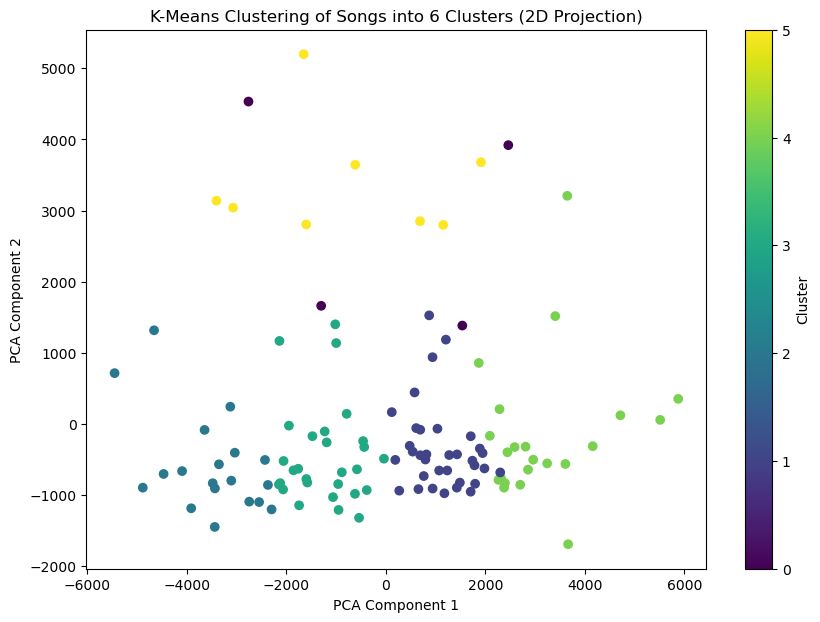

In [32]:

# Reduce dimensions for visualization
pca = PCA(n_components=10)
reduced_data = pca.fit_transform(mfcc_0th_rows_df.drop(columns=['Cluster']))

# Plot clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.title("K-Means Clustering of Songs into 6 Clusters (2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [33]:
# Assume we know the indices of National Anthem songs in mfcc_0th_rows_df
# Replace this with the actual indices if you have them
national_anthem_indices = [0, 1, 2, 3, 4, 5, 6]  # Example indices for National Anthem songs

# Get the cluster labels for the National Anthem songs
national_anthem_clusters = mfcc_0th_rows_df.loc[national_anthem_indices, 'Cluster']

# Display the clusters assigned to National Anthem songs
print("National Anthem Clusters:")
print(national_anthem_clusters.value_counts())

# Analyze the composition of each cluster
# Count the number of songs in each cluster, including non-National Anthem songs
cluster_composition = mfcc_0th_rows_df['Cluster'].value_counts()
print("\nOverall Song Counts in Each Cluster:")
print(cluster_composition)

# List all songs in each cluster to examine the composition further
for cluster_num in range(6):  # Assuming 6 clusters
    songs_in_cluster = mfcc_0th_rows_df[mfcc_0th_rows_df['Cluster'] == cluster_num].index.tolist()
    print(f"\nSongs in Cluster {cluster_num}:")
    print(songs_in_cluster)


National Anthem Clusters:
3    4
1    2
4    1
Name: Cluster, dtype: int64

Overall Song Counts in Each Cluster:
1    34
3    28
4    22
2    19
5     8
0     4
Name: Cluster, dtype: int64

Songs in Cluster 0:
[15, 30, 44, 102]

Songs in Cluster 1:
[1, 5, 9, 14, 20, 21, 31, 34, 38, 41, 42, 47, 48, 53, 54, 55, 56, 57, 58, 60, 67, 70, 71, 75, 76, 79, 84, 86, 87, 89, 91, 103, 107, 109]

Songs in Cluster 2:
[8, 18, 25, 26, 27, 28, 37, 49, 62, 66, 74, 82, 92, 93, 95, 99, 101, 104, 110]

Songs in Cluster 3:
[0, 3, 4, 6, 11, 17, 22, 23, 24, 29, 32, 39, 45, 50, 51, 63, 64, 69, 72, 73, 78, 81, 83, 96, 100, 105, 106, 114]

Songs in Cluster 4:
[2, 7, 10, 12, 13, 19, 35, 36, 40, 43, 46, 52, 59, 68, 77, 80, 85, 88, 94, 97, 111, 112]

Songs in Cluster 5:
[16, 33, 61, 65, 90, 98, 108, 113]


In [7]:

# Initialize lists to store features
statistical_features = []
delta_features = []
delta_delta_features = []
frequency_ratios = []
segmented_features = []
zero_crossing_features = []
average_powers = []
# Initialize lists to store new features
important_mfcc_features = []
spectral_contrast_features = []
rmse_features = []


# Parameters for segmented aggregation
n_segments = 10  # Define number of segments to split each song

# Loop through each song's MFCC data in the list `mfcc_data`
for df in mfcc_data:
    # Drop the 'song_id' column for feature extraction
    mfcc_values = df.drop(columns=['song_id']).values
    
    # 1. Statistical Features: Mean, Variance, Skewness, Kurtosis for each MFCC coefficient
    mean_vals = np.mean(mfcc_values, axis=1)
    var_vals = np.var(mfcc_values, axis=1)
    skew_vals = pd.DataFrame(mfcc_values).skew(axis=1)
    kurt_vals = pd.DataFrame(mfcc_values).kurtosis(axis=1)
    statistical_features.append(np.concatenate([mean_vals, var_vals, skew_vals, kurt_vals]))

    # 2. Temporal Dynamics: Delta and Delta-Delta Coefficients
    delta = librosa.feature.delta(mfcc_values)
    delta_delta = librosa.feature.delta(mfcc_values, order=2)
    delta_mean = np.mean(delta, axis=1)
    delta_var = np.var(delta, axis=1)
    delta_delta_mean = np.mean(delta_delta, axis=1)
    delta_delta_var = np.var(delta_delta, axis=1)
    delta_features.append(np.concatenate([delta_mean, delta_var]))
    delta_delta_features.append(np.concatenate([delta_delta_mean, delta_delta_var]))

    # Exclude the zero-order coefficient for more accurate low/high frequency partitioning
    low_freq_energy = np.sum(mfcc_values[1:10, :])  # Sum of MFCCs 2-10 (low frequencies)
    high_freq_energy = np.sum(mfcc_values[10:, :])  # Sum of MFCCs 11-20 (high frequencies)

    # Calculate the energy ratio, adding a small constant to prevent division by zero
    energy_ratio = low_freq_energy / (high_freq_energy + 1e-6)

    # Append the calculated energy ratio
    frequency_ratios.append([energy_ratio])
        # Calculate the average of the zero-order MFCC coefficient (average power)
    average_power = np.mean(mfcc_values[0, :])  # Index 0 for zero-order coefficient
    average_powers.append([average_power])
    # 4. Segmented Aggregation (Mean and Variance within each segment)
    segment_size = mfcc_values.shape[1] // n_segments
    segment_features = []
    for i in range(n_segments):
        start = i * segment_size
        end = (i + 1) * segment_size
        segment = mfcc_values[:, start:end]
        segment_mean = np.mean(segment, axis=1)
        segment_var = np.var(segment, axis=1)
        segment_features.append(np.concatenate([segment_mean, segment_var]))
    segmented_features.append(np.concatenate(segment_features))

    # 5. Zero-Crossing Rate of MFCC Coefficients
    zcr = np.mean(np.sum(np.diff(mfcc_values > 0, axis=1), axis=1))
    zero_crossing_features.append([zcr])

# Convert feature lists to DataFrames
statistical_features_df = pd.DataFrame(statistical_features)
delta_features_df = pd.DataFrame(delta_features)
delta_delta_features_df = pd.DataFrame(delta_delta_features)
frequency_ratios_df = pd.DataFrame(frequency_ratios, columns=['energy_ratio'])
average_powers_df = pd.DataFrame(average_powers, columns=['average_power'])
segmented_features_df = pd.DataFrame(segmented_features)
zero_crossing_features_df = pd.DataFrame(zero_crossing_features, columns=['zero_crossing_rate'])

# Combine all features into a single DataFrame
combined_features_df = pd.concat([
    statistical_features_df, delta_features_df, delta_delta_features_df, 
    frequency_ratios_df,average_powers_df, segmented_features_df, zero_crossing_features_df
], axis=1)

# Print the shape of the final features DataFrame
print("Shape of combined feature matrix:", combined_features_df.shape)

Shape of combined feature matrix: (115, 563)


c:\Users\91751\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


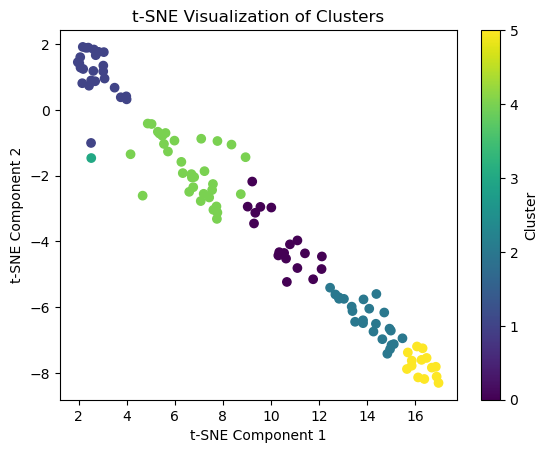

Number of songs in each cluster:
0    18
1    25
2    24
3     1
4    33
5    14
Name: cluster, dtype: int64

Songs in each cluster:
   cluster                                           song_ids
0        0  [7, 12, 16, 20, 23, 44, 47, 54, 55, 65, 68, 73...
1        1  [4, 8, 17, 22, 25, 27, 28, 45, 46, 49, 50, 58,...
2        2  [10, 18, 29, 31, 32, 38, 39, 41, 51, 53, 56, 6...
3        3                                               [15]
4        4  [0, 1, 2, 5, 9, 11, 14, 19, 26, 30, 33, 34, 35...
5        5  [3, 6, 13, 21, 24, 36, 40, 42, 48, 57, 63, 71,...


In [8]:

# Step 1: PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust n_components as needed
pca_features = pca.fit_transform(combined_features_df)

# Step 2: K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(pca_features)
combined_features_df['cluster'] = cluster_labels

# Convert column names to strings (if necessary)
combined_features_df.columns = combined_features_df.columns.astype(str)

# Step 3: t-SNE with specified initialization and learning rate
tsne = TSNE(n_components=2, init='random', learning_rate=250.0, random_state=42)
tsne_features = tsne.fit_transform(pca_features)

# Plot the clusters
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Step 4: Count songs in each cluster and list song IDs
cluster_counts = combined_features_df['cluster'].value_counts().sort_index()
print("Number of songs in each cluster:")
print(cluster_counts)

# List of songs (song IDs) in each cluster
clustered_songs = combined_features_df.groupby('cluster').apply(lambda x: x.index.tolist()).reset_index()
clustered_songs.columns = ['cluster', 'song_ids']

print("\nSongs in each cluster:")
print(clustered_songs)

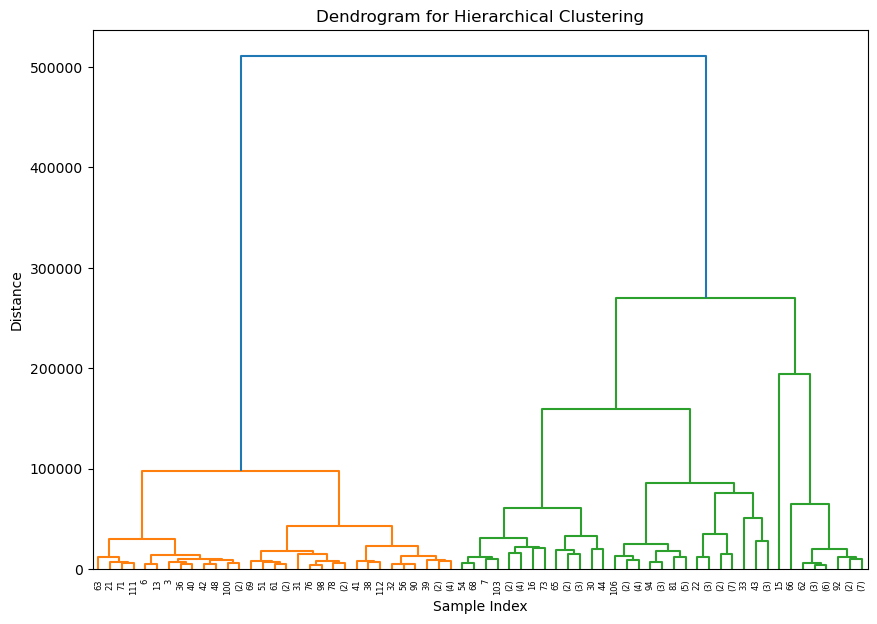

Songs in each hierarchical cluster:
   cluster                                            song_id
0        1  [4, 7, 14, 22, 25, 37, 41, 43, 49, 58, 64, 72,...
1        2  [11, 19, 30, 32, 33, 39, 40, 42, 52, 54, 57, 6...
2        3  [8, 12, 13, 17, 21, 24, 31, 45, 48, 55, 56, 66...
3        4  [1, 2, 3, 6, 10, 15, 20, 23, 27, 29, 34, 35, 3...
4        5  [5, 9, 18, 26, 28, 46, 47, 50, 51, 59, 63, 67,...
5        6                                               [16]
1    14
2    24
3    20
4    35
5    21
6     1
Name: cluster, dtype: int64


In [9]:


# Perform hierarchical clustering on the PCA-reduced features
# Assuming `pca_features` is your PCA-transformed data with reduced dimensions
linked = linkage(pca_features, method='ward')  # Use 'ward' linkage for compact clusters

# Plot the dendrogram to decide where to cut for clusters
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=6)  # Adjust 'p' for depth of visualization
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Decide on a distance threshold for cutting the dendrogram, or set a number of clusters
# For example, distance threshold = 10 or 6 clusters
num_clusters = 6  # Adjust based on dendrogram observation
hierarchical_labels = fcluster(linked, num_clusters, criterion='maxclust')

# Create DataFrame showing each song's cluster assignment
hierarchical_df = pd.DataFrame({
    'song_id': range(1, 116),  # Assuming song IDs are 1 to 115
    'cluster': hierarchical_labels
})

# Display the songs in each cluster
print("Songs in each hierarchical cluster:")
print(hierarchical_df.groupby('cluster')['song_id'].apply(list).reset_index())
print(hierarchical_df['cluster'].value_counts().sort_index())


Optimal eps value for DBSCAN based on k-Nearest Neighbors distance plot: 24297.964358345995


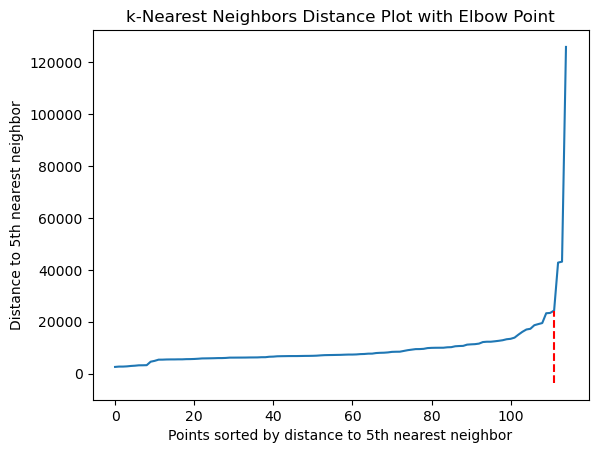

In [13]:
from kneed import KneeLocator
from sklearn.neighbors import NearestNeighbors

# Calculate distances to the 5 nearest neighbors (k = min_samples for DBSCAN)
k = 5  # Should match your DBSCAN's min_samples
nearest_neighbors = NearestNeighbors(n_neighbors=k)
nearest_neighbors.fit(pca_features)
distances, indices = nearest_neighbors.kneighbors(pca_features)

# Sort the distances to the k-th nearest neighbor
distances = np.sort(distances[:, k-1])

# Use the Kneedle algorithm to find the "elbow" in the sorted distances
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
optimal_eps = distances[kneedle.elbow]

print("Optimal eps value for DBSCAN based on k-Nearest Neighbors distance plot:", optimal_eps)
plt.plot(distances)
plt.vlines(kneedle.elbow, plt.ylim()[0], distances[kneedle.elbow], linestyles='dashed', colors='r')
plt.xlabel("Points sorted by distance to {}th nearest neighbor".format(k))
plt.ylabel("Distance to {}th nearest neighbor".format(k))
plt.title("k-Nearest Neighbors Distance Plot with Elbow Point")
plt.show()


In [14]:

# Define parameters for DBSCAN
eps = 24298.05894306903  # Maximum distance between points in a neighborhood, adjust based on your data
min_samples = 5  # Minimum number of points to form a dense region

# Apply DBSCAN on the PCA-reduced features
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(pca_features)

# Create DataFrame showing each song's cluster assignment with DBSCAN
dbscan_df = pd.DataFrame({
    'song_id': range(1, 116),  # Assuming song IDs are 1 to 115
    'cluster': dbscan_labels
})

# Display the songs in each DBSCAN cluster
# Note: DBSCAN assigns -1 to noise points (those not belonging to any cluster)
print("Songs in each DBSCAN cluster (Noise points marked as -1):")
print(dbscan_df.groupby('cluster')['song_id'].apply(list).reset_index())
print(dbscan_df['cluster'].value_counts().sort_index())


Songs in each DBSCAN cluster (Noise points marked as -1):
   cluster                                            song_id
0       -1                                       [16, 34, 67]
1        0  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
-1      3
 0    112
Name: cluster, dtype: int64


In [15]:

# Initialize an empty list to store the power information (first row) of each segment
power_features = []

for df in mfcc_data:
    # Get the number of columns (excluding the 'song_id' column)
    num_columns = df.shape[1] - 1
    segment_size = num_columns // 86  # Calculate the segment size

    # Initialize an empty list to store the power means of each segment
    segment_power_means = []

    # Iterate through the segments
    for i in range(86):
        # Calculate the start and end indices of the segment
        start = i * segment_size
        end = (i + 1) * segment_size

        # Get the mean of the first row (power) in the segment
        segment_mean = df.iloc[0, start:end].mean()

        # Append the segment mean to the list
        segment_power_means.append(segment_mean)

    # Calculate the remaining columns
    remaining_columns = num_columns % 86

    # If there are remaining columns, calculate their mean and append to the list
    if remaining_columns > 0:
        start = 86 * segment_size
        end = start + remaining_columns
        segment_mean = df.iloc[0, start:end].mean()
        segment_power_means.append(segment_mean)

    # Aggregate every 3 series
    aggregated_power_means = []
    for i in range(0, 86, 3):
        # Calculate the mean of every 3 series
        mean_of_three = np.mean(segment_power_means[i:i+3])
        aggregated_power_means.append(mean_of_three)

    # Append the aggregated power means (should be 29 per song)
    power_features.append(aggregated_power_means)

# Convert to DataFrame
power_df = pd.DataFrame(power_features)

# Print the shape of the DataFrame to verify it is 115x29
print(power_df.shape)


(115, 29)


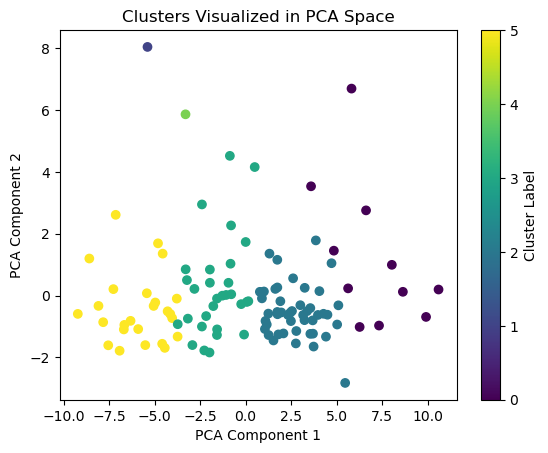

0    11
1     1
2    47
3    30
4     1
5    25
Name: cluster, dtype: int64
cluster
0    11
1     1
2    47
3    30
4     1
5    25
Name: cluster, dtype: int64


In [16]:

scaler = StandardScaler()
scaled_power = scaler.fit_transform(power_df)

# PCA for dimensionality reduction (to 2 components for visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_power)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(scaled_power)

# Add cluster labels to the DataFrame
power_df['cluster'] = clusters

# Visualize clusters using PCA
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# count the number of songs in each cluster
cluster_counts = power_df['cluster'].value_counts().sort_index()
print(cluster_counts)

# which cluster corresponds to which songs in the dataset
cluster_songs = power_df.groupby('cluster')['cluster'].count()
print(cluster_songs)
# store power df index and power df cluster in a new dataframe
cluster_songs_df = pd.DataFrame(power_df['cluster'])
cluster_songs_df['cluster'] = cluster_songs_df.index


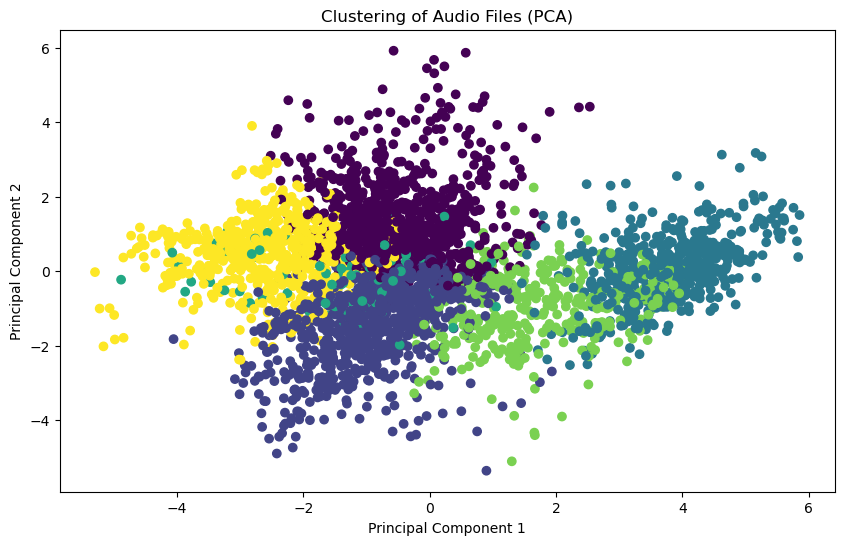

Cluster 0: Mean Feature Values:
0    -218.365753
1     147.274934
2     -34.882949
3      48.643065
4      -5.783066
5      19.869635
6     -13.417348
7      11.609109
8      -8.071355
9       0.209430
10     -9.488318
11      3.449666
12     -4.968279
13     -1.470077
14     -3.497992
15     -4.129365
16     -6.323468
17     -4.383532
18     -3.428965
19     -4.752504
dtype: float64
Cluster 1: Mean Feature Values:
0    -212.370225
1     143.692424
2     -56.419073
3      50.955632
4      -8.729784
5      10.546053
6      -6.654928
7      12.139587
8     -10.222893
9      -0.133004
10     -1.954715
11     -3.636242
12     -7.440808
13     -2.868540
14     -2.152979
15     -1.915978
16      4.037193
17     -0.301735
18      3.088702
19      2.537964
dtype: float64
Cluster 2: Mean Feature Values:
0    -288.168756
1     221.829213
2     -57.606567
3      -2.353696
4      28.766635
5     -10.136707
6      -8.175563
7      -0.855310
8      -9.917619
9      -7.727834
10     -8.304259
11     

In [49]:


# 3. Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(segmented_means2_df)  

# 4. Apply PCA (retain more components)
pca = PCA(n_components=0.999)  # Retain components explaining 95% of variance
pca_result = pca.fit_transform(scaled_data)

# 5. Apply k-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Experiment with different k
cluster_labels = kmeans.fit_predict(pca_result)

# 6. Analyze and Visualize

# (a) Visualize the clusters (using the first 2 PCA components for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels)
plt.title("Clustering of Audio Files (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# (b) Analyze cluster characteristics (e.g., calculate mean feature values per cluster)
for cluster_id in range(6):  # Assuming 10 clusters
    cluster_data = segmented_means2_df[cluster_labels == cluster_id]
    mean_features = cluster_data.mean()
    print(f"Cluster {cluster_id}: Mean Feature Values:\n{mean_features}")

# ... (Further analysis, potentially manual labeling, and visualization)

# 7. Train a classifier (e.g., SVM) to predict the clusters
X_train, X_test, y_train, y_test = train_test_split(pca_result, cluster_labels, test_size=0.2, random_state=42)
clf = SVC(kernel='linear', random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


In [65]:

def extract_features(mfcc_df):
    features = []
    for row in range(mfcc_df.shape[0] - 1):  # Exclude 'song_id' row if present
        row_data = mfcc_df.iloc[row, :-1]  # Exclude 'song_id' column if present
        # Calculate features
        mean = np.mean(row_data)
        std_dev = np.std(row_data)
        min_val = np.min(row_data)
        max_val = np.max(row_data)
        
        # Append features
        features.extend([mean, std_dev, min_val, max_val])
    return features

# Applying feature extraction on all MFCC files
all_features = [extract_features(mfcc) for mfcc in mfcc_data]

In [70]:

# Convert the list of features into a DataFrame
feature_columns = [f'feature_{i+1}' for i in range(len(all_features[0]))]  # Name columns as feature_1, feature_2, etc.
feature_df = pd.DataFrame(all_features, columns=feature_columns)

# Display the first few rows of the DataFrame to check
print(feature_df.head())

    feature_1   feature_2   feature_3   feature_4   feature_5  feature_6  \
0 -257.561977  119.284474  -853.26044  -47.807823  177.002699  33.935159   
1 -245.063683  118.809350  -869.57710  -69.022520  154.202354  27.689124   
2 -159.599373  124.425065 -1131.37080   57.620037  136.081404  33.643084   
3 -265.243088  144.418583 -1131.37080 -108.747890  100.379050  33.149594   
4 -266.462137   44.746250  -537.34393 -115.459145  220.829545  19.308622   

    feature_7  feature_8  feature_9  feature_10  ...  feature_67  feature_68  \
0  -37.576675  256.07068 -11.068304   20.629730  ...  -30.964360   34.874332   
1   -8.576799  230.70139 -14.025068   19.428444  ...  -45.963543   13.161325   
2  -67.822660  298.03668 -52.881882   29.922669  ...  -34.096664   58.407696   
3    0.000000  207.05118 -59.644083   25.429575  ...  -42.880943   58.206635   
4  111.571920  277.52423 -59.768480   21.400189  ...  -38.767720   29.927156   

   feature_69  feature_70  feature_71  feature_72  feature_73 

In [67]:

# Number of clusters (as per the requirement of 6 groups)
n_clusters = 6

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans_labels = kmeans.fit_predict(all_features)

# The kmeans_labels array contains the cluster assignments for each MFCC file
# For example, kmeans_labels[0] will be the cluster label for the first MFCC file
print("Cluster labels for each file:", kmeans_labels)

Cluster labels for each file: [1 1 2 0 3 2 0 2 3 2 2 2 2 2 1 0 4 5 0 1 2 2 0 2 0 5 1 3 5 0 2 2 2 2 1 4 2
 0 2 0 2 2 2 2 2 5 4 2 2 3 3 0 4 2 2 2 2 2 3 4 1 2 5 0 2 0 0 2 2 0 4 2 0 2
 1 4 2 4 2 5 1 0 5 3 2 4 1 2 4 1 2 0 5 0 1 3 5 1 2 3 0 0 4 2 0 2 1 1 2 0 5
 2 2 2 4]


c:\Users\91751\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\91751\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


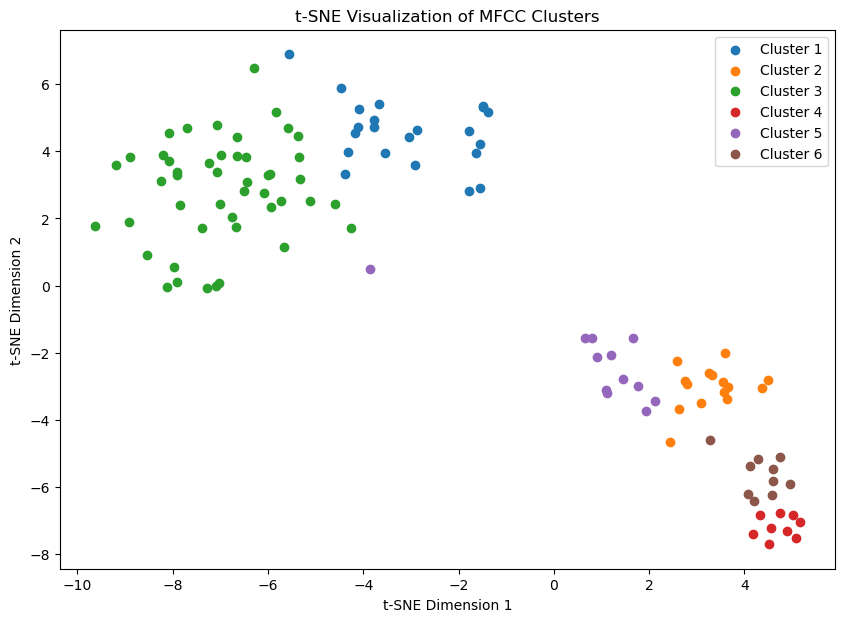

Cluster labels for each file: [1 1 2 0 3 2 0 2 3 2 2 2 2 2 1 0 4 5 0 1 2 2 0 2 0 5 1 3 5 0 2 2 2 2 1 4 2
 0 2 0 2 2 2 2 2 5 4 2 2 3 3 0 4 2 2 2 2 2 3 4 1 2 5 0 2 0 0 2 2 0 4 2 0 2
 1 4 2 4 2 5 1 0 5 3 2 4 1 2 4 1 2 0 5 0 1 3 5 1 2 3 0 0 4 2 0 2 1 1 2 0 5
 2 2 2 4]
Number of songs in each cluster:
0    22
1    15
2    47
3     9
4    12
5    10
dtype: int64


In [91]:

# Initialize t-SNE with 2 components for 2D visualization
tsne = TSNE(n_components=2, random_state=0)
tsne_results = tsne.fit_transform(all_features)

# Plotting the t-SNE results and coloring by K-means cluster
plt.figure(figsize=(10, 7))
for i in range(n_clusters):
    # Select points belonging to the current cluster
    cluster_points = tsne_results[kmeans_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
    
plt.title("t-SNE Visualization of MFCC Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.legend()
plt.show()

# print cluster labels for each file
print("Cluster labels for each file:", kmeans_labels)
# count of songs in each cluster
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
print("Number of songs in each cluster:")
print(cluster_counts)


Silhouette Score: 0.24424566181828317


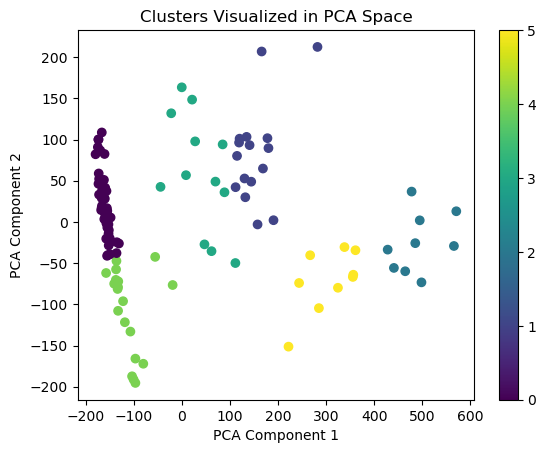

0    49
1    16
2     9
3    12
4    20
5     9
Name: cluster, dtype: int64


In [92]:
# Assume 'feature_df' is the DataFrame from earlier, containing features without labels

from sklearn.metrics import silhouette_score
# PCA for dimensionality reduction (to 2 components for visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(feature_df)

# Apply K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(pca_features)

# Add cluster labels to the DataFrame
feature_df['cluster'] = clusters

# Evaluate clustering with silhouette score
sil_score = silhouette_score(feature_df, clusters)
print(f'Silhouette Score: {sil_score}')

# Plot the clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters Visualized in PCA Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# count the number of songs in each cluster
cluster_counts = feature_df['cluster'].value_counts().sort_index()
print(cluster_counts)
